In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer()
print (breast_cancer.feature_names)
print (breast_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns=breast_cancer.feature_names)

# Add the target variable to the dataframe
df['target'] = y

# Print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
from sklearn import tree

plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>

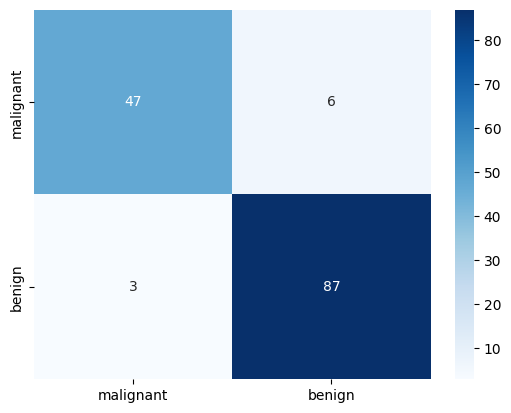

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
#disp.plot()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Test score 0.9370629370629371


### Constraining with prepruning hyperparameters

In [11]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>

# Pre pruning

In [13]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6],
         'min_samples_split': [10,15,20],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 15, 20]})

Test score 0.9440559440559441


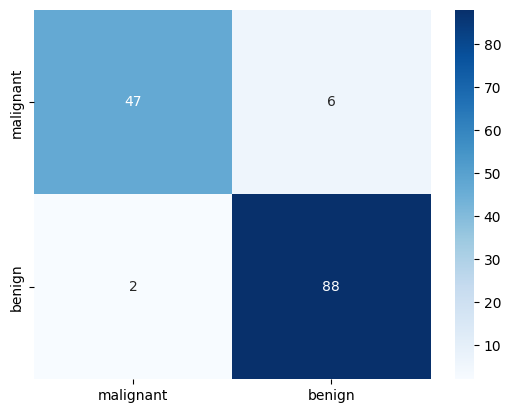

In [14]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Test score {accuracy_score(y_test_pred,y_test)}')

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
plt.show()

In [15]:
plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>

#### Post pruning demo 

In [16]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00127152 0.00254366 0.00353205 0.00733568 0.00933469
 0.01395534 0.05017756 0.33379055]
[0.03658778 0.0378593  0.04040296 0.04393501 0.05127069 0.06994008
 0.08389541 0.13407297 0.46786352]


In [17]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

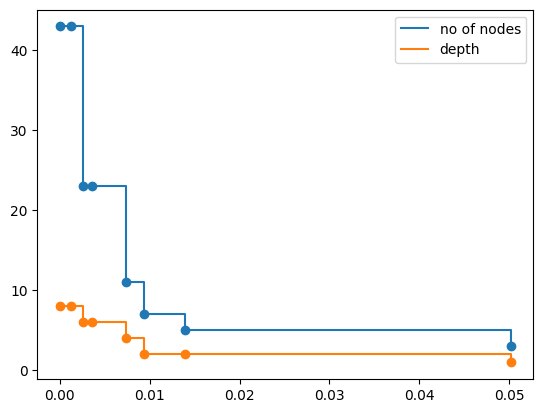

In [18]:
# We will remove the last element in clfs and ccp_alphas
# because it is the trivial tree with only one node

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

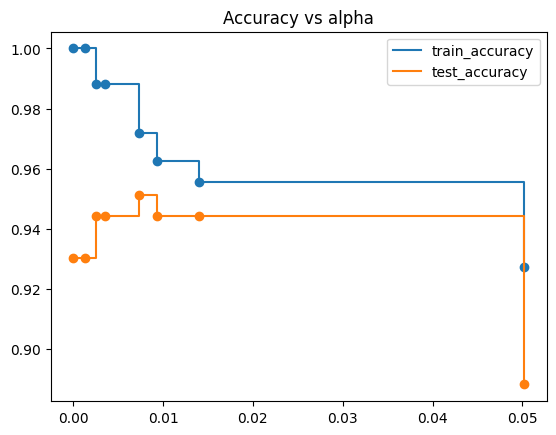

In [19]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.971830985915493
Test score 0.951048951048951


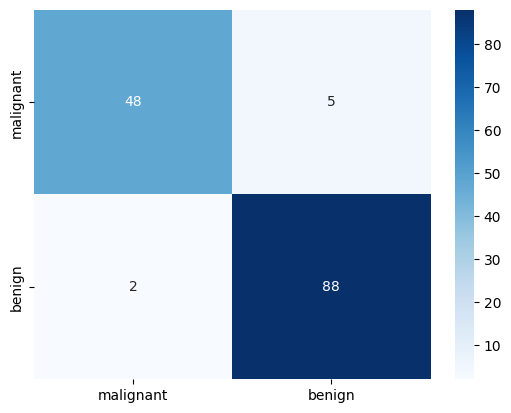

In [20]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.008)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
plt.show()

In [21]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Benign','Malignant']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>